In [2]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# load the data set
#url='https://drive.google.com/file/d/1PNqLQXezk3a4DhPIiUe51PGRhVmOiA8C/view'
#url='https://drive.google.com/uc?id=' + url.split('/')[-2]

dfred = pd.read_csv("wine_data/winequality-red.csv",sep = ";")
dfwhite = pd.read_csv("wine_data/winequality-white.csv", sep = ";")
dfred.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [43]:
#New column to demoninate wine type
#Red = 0
#White = 1

dfred.insert(0,"wine_type","0")
dfwhite.insert(0,"wine_type", "1")


allwine_base_df = pd.concat([dfred,dfwhite], axis = 0, ignore_index=True)
#allwine_base_df.head(10)
allwine_base_df.head(10)



,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,0,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,0,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,0,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,0,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [37]:
#check data types
allwine_base_df.dtypes
#filtered_allwines = allwine_base_df.drop('wine type', axis=1)
#allwine_base_df.head(10)

wine_type                object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [44]:
# Checking for NULLs in the data
allwine_base_df.isnull().sum()

wine_type               0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [45]:
#checking for du
allwine_base_df.duplicated().sum()

1177

In [46]:
#checking for categorical values relationships
string_col = allwine_base_df.select_dtypes(include="object").columns
allwine_base_df[string_col].head()




,wine_type
0,0
1,0
2,0
3,0
4,0


In [47]:
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(allwine_base_df[col].value_counts())


The distribution of categorical values in the wine_type is : 
wine_type
1    4898
0    1599
Name: count, dtype: int64


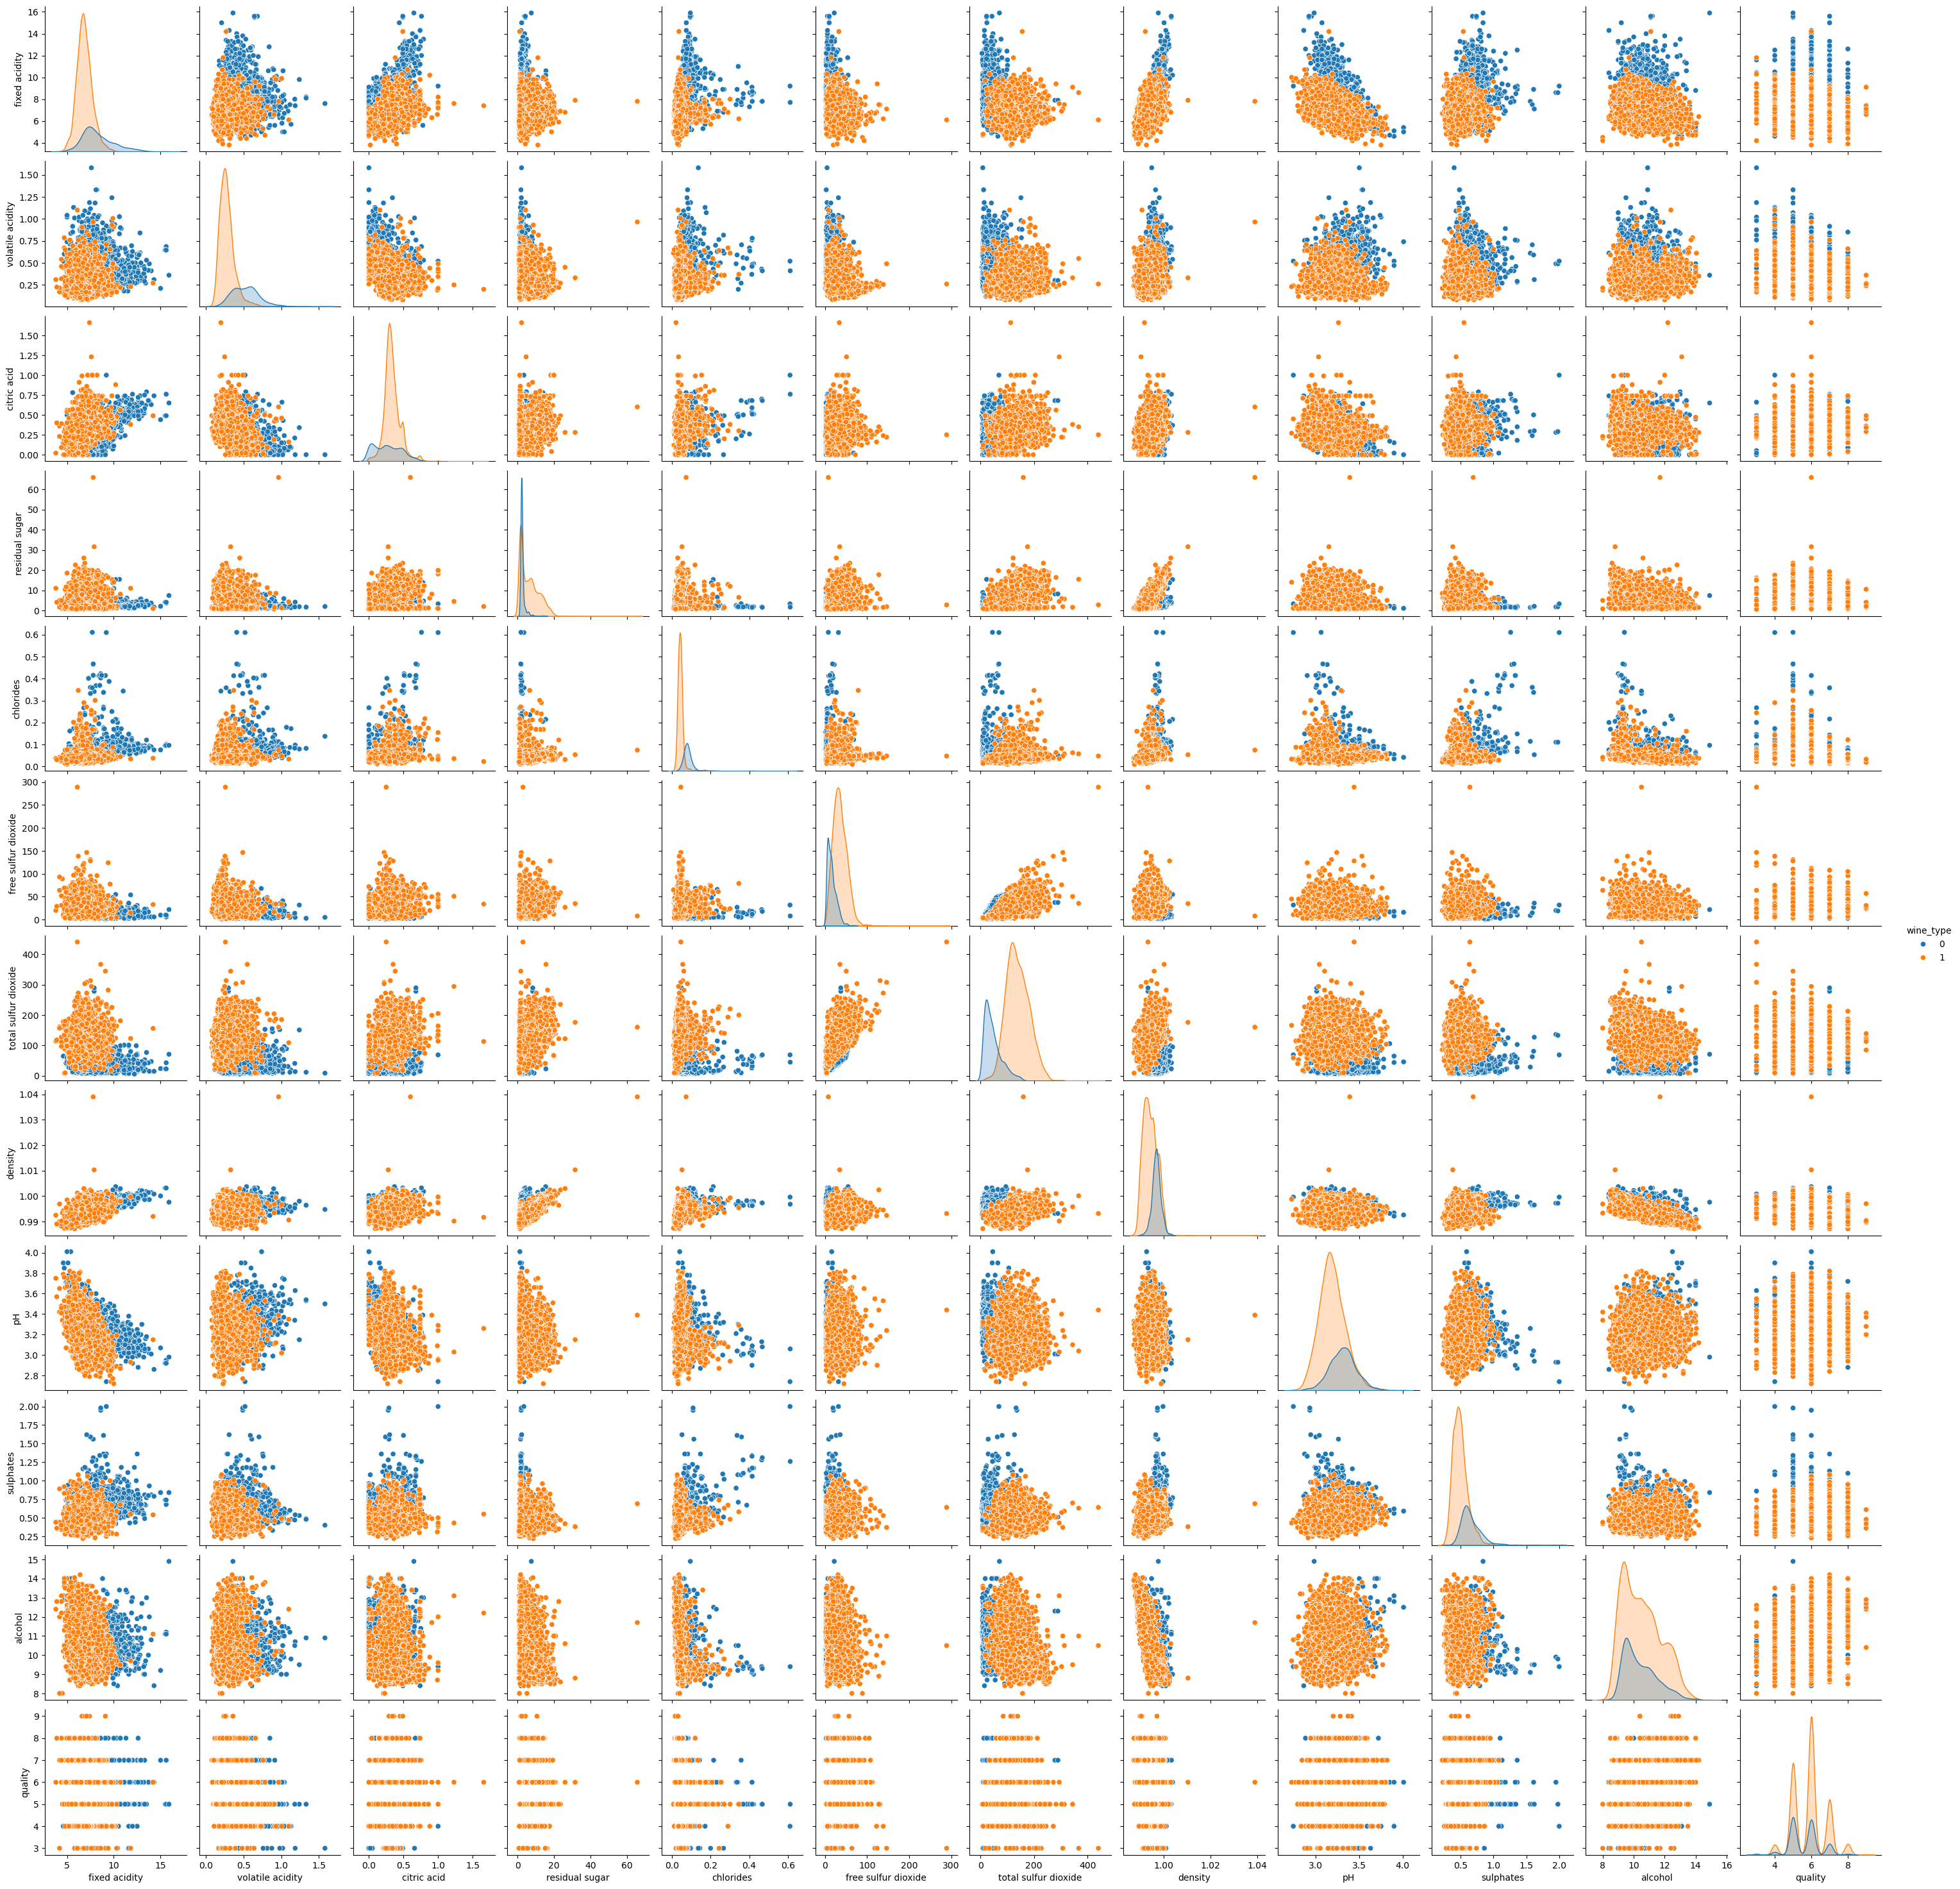

In [48]:
#Pairplot for plotting the distribution of Heartdisease and no Heartdisease patients against different features
sns.pairplot(data=allwine_base_df,hue='wine_type')

In [51]:
#allwine_base_df.head()

allwine_base_df.dtypes

wine_type                object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [52]:
###Encoding:
df_copy = allwine_base_df.copy()
# Using replace
#df_copy['Sex'].replace({'M':1, 'F':0}, inplace=True)
#df_copy['ExerciseAngina'].replace({'Y':1, 'N':0}, inplace=True)

# using 'pd.get_dummies()'
cat_cols=df_copy.select_dtypes('object')
cat_col_encode = pd.get_dummies(cat_cols)

# drop categorical columns
#df_copy.drop(columns=cat_cols, axis=1, inplace=True)

# combine new columns with original dfm
dfml = pd.concat([df_copy, cat_col_encode], axis=1)

# view first 5 rows
dfml.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_0,wine_type_1
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True,False
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True,False
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True,False
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False


In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and y
X = dfml.drop('wine_type', axis=1)
y = dfml['wine_type']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
y_test.shape

(1300,)

In [55]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=100)

In [56]:
# fit model
LR_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [57]:
# predictions
preds = LR_model.predict(x_test)

In [58]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_0,wine_type_1
3103,7.0,0.170,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,False,True
1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,True,False
4761,6.8,0.390,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,False,True
4690,6.3,0.280,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,False,True
4032,7.4,0.350,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,10.7,0.900,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5,True,False
2850,5.7,0.245,0.33,1.1,0.049,28.0,150.0,0.99270,3.13,0.42,9.3,5,False,True
4917,6.6,0.160,0.35,1.8,0.042,26.0,105.0,0.98962,3.19,0.75,12.4,7,False,True
5198,6.6,0.390,0.38,9.7,0.053,49.0,226.0,0.99787,3.30,0.57,9.4,6,False,True


In [59]:
y_test


3103    1
1419    0
4761    1
4690    1
4032    1
       ..
889     0
2850    1
4917    1
5198    1
5643    1
Name: wine_type, Length: 1300, dtype: object

In [ ]:
#Evaluate models' accuracy
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc = accuracy_score(y_test, preds)
print(acc)


0.9992307692307693


In [62]:
from sklearn.metrics import classification_report


In [63]:
#Evaluate performance
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       341
           1       1.00      1.00      1.00       959

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
#Read confusion matrix to see 
confusion_matrix(y_test, preds)

array([[340,   1],
       [  0, 959]], dtype=int64)

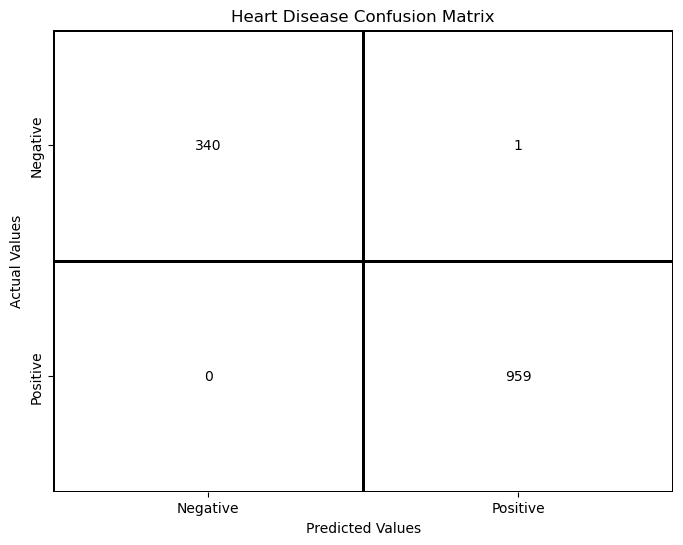

In [66]:
cm = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(cm,
                     index = ["Negative","Positive"],
                     columns = ["Negative","Positive"])
plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Heart Disease Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# outputs a matrix for each instance in a feature and how many times it got the prediction right
#output: array([Actual NEG VAL PREDICTED how many WRONG, ACTUAL NEG VAL HOW MANY PREDICTED RIGHT,
#                ACTUAL POS VAL PREDICTED how many WRONG, ACTUAL POS VAL HOW MANY PREDICTED RIGHT])
            #Look at diagonal 
            # (negative) diagonal: "ACTUAL TRUE predictions"
            # (positive) diagonal: "PREDICTED that were wrong"

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
#Try a different model: Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=101)

In [69]:
# fit model
RF_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=101)

In [70]:
# predictions
preds = RF_clf.predict(x_test)

In [ ]:
# accuracy
acc = accuracy_score(y_test, preds)
print(acc) ###SUSPICIOUS, should never be 100%

1.0


In [72]:
dfmls = dfml.copy()

# split data into X and Y
X = dfmls
y = dfmls['wine_type']

In [73]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [74]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(x_train)
x_train_scaled=Scaler.transform(x_train)
x_test_scaled=Scaler.transform(x_test)

In [75]:
x_train

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_0,wine_type_1
3761,1,9.9,0.490,0.23,2.40,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,6,False,True
3740,1,7.7,0.280,0.35,15.30,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000,5,False,True
1359,0,11.6,0.475,0.40,1.40,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,True,False
1230,0,7.7,0.180,0.34,2.70,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000,6,True,False
4751,1,7.6,0.250,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000,6,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.200000,5,False,True
5191,1,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.700000,7,False,True
5226,1,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.500000,5,False,True
5390,1,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.500000,5,False,True


In [76]:
x_train_scaled

array([[1.        , 0.51694915, 0.27333333, ..., 0.5       , 0.        ,
        1.        ],
       [1.        , 0.33050847, 0.13333333, ..., 0.33333333, 0.        ,
        1.        ],
       [0.        , 0.66101695, 0.26333333, ..., 0.5       , 1.        ,
        0.        ],
       ...,
       [1.        , 0.22033898, 0.19333333, ..., 0.33333333, 0.        ,
        1.        ],
       [1.        , 0.22881356, 0.12      , ..., 0.33333333, 0.        ,
        1.        ],
       [0.        , 0.28813559, 0.36      , ..., 0.33333333, 1.        ,
        0.        ]])

In [ ]:
# LogisticRegression model
LR_model = LogisticRegression(random_state=42)

# fit model
LR_model.fit(x_train_scaled, y_train)

# predictions
preds = LR_model.predict(x_test_scaled)

#accuracy
acc = accuracy_score(y_test, preds)
print(acc) ##SUSPICIOUS, should never be 100% correct predictions

1.0


In [79]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=4)

# fit model
RF_clf.fit(x_train, y_train)

# predictions
preds = RF_clf.predict(x_test)

# accuracy
acc = accuracy_score(y_test, preds)
print(acc)

1.0
